In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Read the CSV file into a DataFrame

city_bike_df = pd.read_csv('city_bikes_data.csv')
foursquare_df = pd.read_csv('foursquare_data_latest.csv')
yelp_df = pd.read_csv('yelp_data_latest.csv')

In [19]:
city_bike_df

,city,name,latitude,longitude,slots,empty_slots,no_of_bikes
0,Vancouver,10th & Cambie,49.262487,-123.114397,36,34,2
1,Vancouver,Yaletown-Roundhouse Station,49.274566,-123.121817,16,8,7
2,Vancouver,Dunsmuir & Beatty,49.279764,-123.110154,26,11,14
3,Vancouver,12th & Yukon (City Hall),49.260599,-123.113504,16,11,5
4,Vancouver,8th & Ash,49.264215,-123.117772,16,9,6
...,...,...,...,...,...,...,...
239,Vancouver,Cordova & Granville,49.285670,-123.112543,18,7,11
240,Vancouver,22nd & Main,49.250940,-123.101306,14,14,0
241,Vancouver,PNE - Hastings & Windermere,49.280977,-123.035969,40,25,15
242,Vancouver,1st & Fir,49.270783,-123.141564,20,3,17


In [20]:
foursquare_df.head()

,bike_station_coordinates,name,category1,category2,category3,distance,latitude,longitude,locality,price,rating
0,"49.262487,-123.114397",Marulilu Cafe,Café,Japanese Restaurant,NaN,96,49.263328,-123.114020,Vancouver,2.0,8.2
1,"49.262487,-123.114397",Aperture Coffee Bar,Café,Coffee Shop,Restaurant,299,49.263292,-123.110529,Vancouver,1.0,8.7
2,"49.262487,-123.114397",Milano Coffee,Coffee Shop,Restaurant,NaN,430,49.263724,-123.108701,Vancouver,2.0,9.0
3,"49.262487,-123.114397",Caffe Cittadella,Coffee Shop,Restaurant,NaN,336,49.264730,-123.116978,Vancouver,2.0,8.6
4,"49.262487,-123.114397",Elysian Coffee Broadway,Coffee Shop,Restaurant,NaN,225,49.263077,-123.117243,Vancouver,1.0,8.1


In [21]:
yelp_df.head()

,yelp_bike_station_coordinates,name,latitude,longitude,rating,price,distance,category_1,category_2,category_3,review_count
0,"49.262487,-123.114397",Saku,49.263101,-123.116675,4.5,$$,38.092128,Japanese,NaN,NaN,224
1,"49.262487,-123.114397",La Taqueria Pinche Taco Shop,49.263559,-123.112736,4.0,$$,255.181363,Mexican,NaN,NaN,682
2,"49.262487,-123.114397",Yolks,49.263114,-123.116353,3.5,$$,29.354770,Coffee & Tea,Breakfast & Brunch,Breakfast & Brunch,348
3,"49.262487,-123.114397",Hokkaido Ramen Santouka,49.263127,-123.116892,4.0,$$,50.822267,Noodles,Ramen,Ramen,223
4,"49.262487,-123.114397",Rogue Kitchen & Wetbar,49.263047,-123.117827,3.5,$$,118.967966,American (Traditional),Gastropubs,Gastropubs,146


Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [22]:
# rounding of the latitude and longitude to fetch better resultsets
city_bike_df['latitude'] = city_bike_df['latitude'].round(3)
city_bike_df['longitude'] = city_bike_df['longitude'].round(3)

foursquare_df['latitude'] = foursquare_df['latitude'].round(3)
foursquare_df['longitude'] = foursquare_df['longitude'].round(3)

yelp_df['latitude'] = yelp_df['latitude'].round(3)
yelp_df['longitude'] = yelp_df['longitude'].round(3)


final_merged_df = pd.merge(foursquare_df, yelp_df, on=['latitude', 'longitude'],how='outer')
final_df = pd.merge(city_bike_df, final_merged_df, on=['latitude', 'longitude'],how='outer')

final_df

,city,name,latitude,longitude,slots,empty_slots,no_of_bikes,bike_station_coordinates,name_x,category1,...,rating_x,yelp_bike_station_coordinates,name_y,rating_y,price_y,distance_y,category_1,category_2,category_3,review_count
0,Vancouver,10th & Cambie,49.262,-123.114,36.0,34.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vancouver,Yaletown-Roundhouse Station,49.275,-123.122,16.0,8.0,7.0,"49.274566,-123.121817",The Flying Pig Yaletown,Restaurant,...,8.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vancouver,Yaletown-Roundhouse Station,49.275,-123.122,16.0,8.0,7.0,"49.274566,-123.121817",MeeT in Yaletown,Vegan and Vegetarian Restaurant,...,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Vancouver,Yaletown-Roundhouse Station,49.275,-123.122,16.0,8.0,7.0,"49.273471,-123.118016",The Flying Pig Yaletown,Restaurant,...,8.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vancouver,Yaletown-Roundhouse Station,49.275,-123.122,16.0,8.0,7.0,"49.273663,-123.127075",The Flying Pig Yaletown,Restaurant,...,8.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35255,NaN,NaN,49.263,-123.120,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"49.2856698,-123.1125432",Lotus Seed Vegan,4.0,$$,341.774806,Vegan,NaN,NaN,129.0
35256,NaN,NaN,49.263,-123.120,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"49.25094,-123.101306",Lotus Seed Vegan,4.0,$$,341.774806,Vegan,NaN,NaN,129.0
35257,NaN,NaN,49.263,-123.120,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"49.280977,-123.035969",Lotus Seed Vegan,4.0,$$,341.774806,Vegan,NaN,NaN,129.0
35258,NaN,NaN,49.263,-123.120,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"49.270783,-123.141564",Lotus Seed Vegan,4.0,$$,341.774806,Vegan,NaN,NaN,129.0


In [25]:
print(final_df.describe())

           latitude     longitude        slots  empty_slots  no_of_bikes  \
count  35260.000000  35260.000000  1013.000000  1013.000000  1013.000000   
mean      49.262115   -123.115964    18.634748    11.174729     6.807502   
std        0.004978      0.007998     4.529968     3.824468     4.844363   
min       49.234000   -123.210000     0.000000     0.000000     0.000000   
25%       49.258000   -123.117000    14.000000    10.000000     1.000000   
50%       49.263000   -123.115000    18.000000    11.000000     7.000000   
75%       49.263000   -123.115000    22.000000    13.000000    10.000000   
max       49.309000   -123.023000    40.000000    34.000000    31.000000   

         distance_x       price_x      rating_x      rating_y    distance_y  \
count  32377.000000  32027.000000  32354.000000  32696.000000  32696.000000   
mean     478.762825      1.595373      8.399073      3.977612    307.495579   
std      245.606611      0.571755      0.392689      0.258196    241.900131   

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

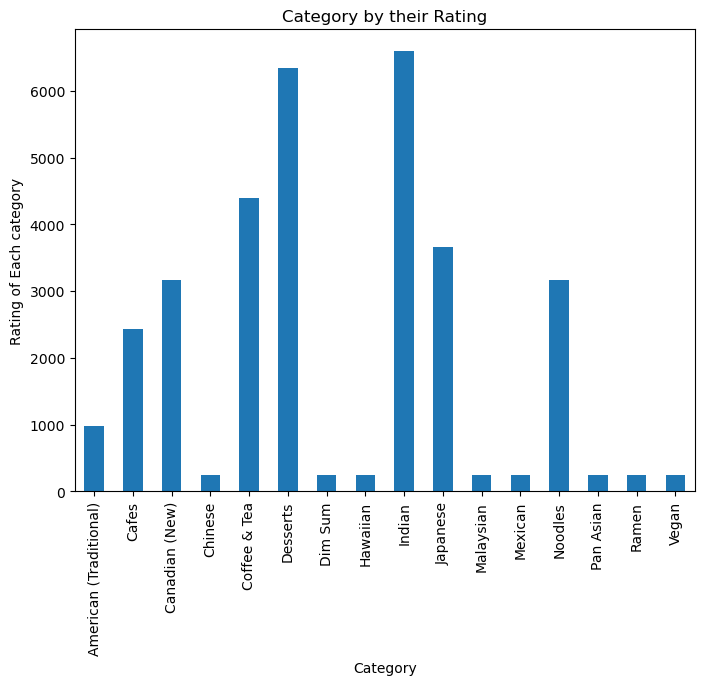

In [23]:
# Looking for any correlation between category of venue and no of bikes.
df_visual = final_df.groupby('category_1')['rating_y'].count()
# create a histogram of the mean bikes_available for each category
df_visual.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Category')
plt.ylabel('Rating of Each category')
plt.title('Category by their Rating')
plt.show()

Text(0.5, 0, 'Distance in Meters')

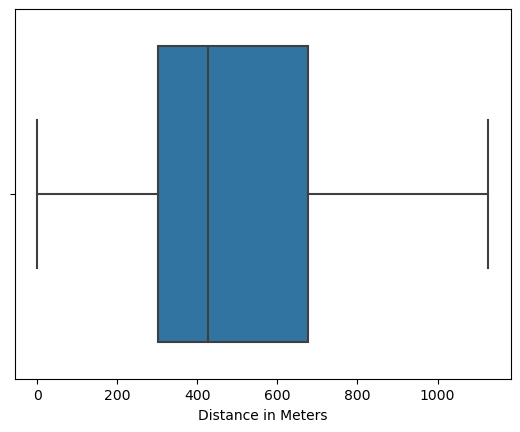

In [24]:
sns.boxplot(x=final_df['distance_x'])
plt.xlabel('Distance in Meters')

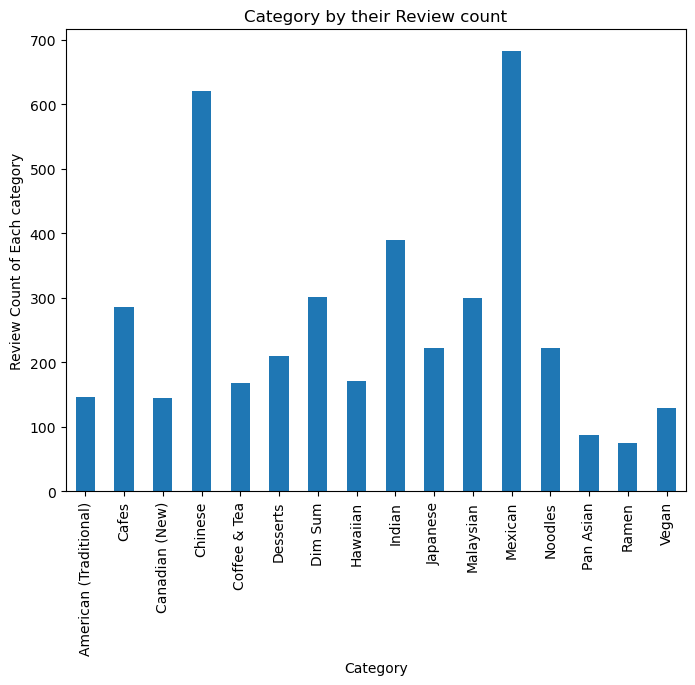

In [26]:
# a histogram with total_profit by each month
# Looking for any correlation between category of venue and no of bikes.
df_visual = final_df.groupby('category_1')['review_count'].mean()
# create a histogram of the mean bikes_available for each category
df_visual.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Category')
plt.ylabel('Review Count of Each category')
plt.title('Category by their Review count')
plt.show()

<Axes: >

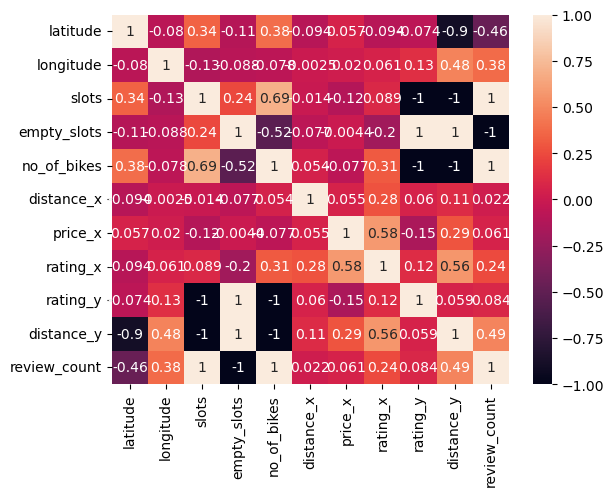

In [27]:
fig = final_df.corr(numeric_only = True)
sns.heatmap(fig,annot=True)

# Database

In [16]:
#Create Database connection and DB 

import sqlite3
import pandas as pd

# Create a SQLite database
conn = sqlite3.connect('statmoddel_python_poi.db')
print("Connection to SQLite DB successful")

Connection to SQLite DB successful


Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [17]:
#Import the dataframes into the database as tables

#city_bike_df converted to corresponding table
city_bike_df.to_sql('city_bike_api_df', conn, if_exists='replace', index=False)

#four_square_df converted to corresponding table
foursquare_df.to_sql('four_square_api_df', conn, if_exists='replace', index=False)

#yelp_df converted to corresponding table
yelp_df.to_sql('yelp_api_df', conn, if_exists='replace', index=False)

#Final_df converted to corresponding table
final_df.to_sql('poi_df', conn, if_exists='replace', index=False)

35260

Look at the data before and after the join to validate your data.